In [1]:
'''Load this code, you don't have to change anything'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

def predict(X, w):
    a = X.dot(w) < 0  
    a = a.astype(int)  # will be True if less than zero
    a[a == 1] = -1     # hence gets the label -1
    a[a == 0] = 1      # else gets the label 1 b/c greater than 0
    return a

def accuracy(X, w, y):
    return np.sum(predict(X, w) == y)/y.size

def loss(weights, features, labels):
    return np.sum((labels - features.dot(weights)) ** 2)

def grad(weights, features, labels):
    a =  -2 * np.multiply(features, (labels - features.dot(weights)))
    return np.sum(a, axis=0).reshape(-1, 1)


In [2]:
# Load the iris dataset

iris = datasets.load_iris()
N = 100
X = iris.data[:, :2][0:N]  # we only take the first two features and 100 rows
y = iris.target[0:N]       # we only take the first two features and 100 rows
 
N, F = X.shape

y = y.reshape(N,1)

y[y == 0] = -1

# Initialize the weights

w = np.random.rand(F).reshape(F,1)

### Building intuition for the loss function 

Describe the loss function for Adeline in your own words. What does the equation say? 

The loss function is the sum of the squared difference of the target variable (labels) and the net input to the output unit (features.dot(weights)). This function returns the SSE, which we want to minimize.

### Examining the existing code

Using the slides on Adeline as a guide, please examine the `predict`, `accuracy`, `loss` and `grad` functions above. Please describe in your own words what each function is doing 

The predict function takes the features dotted with the weights to create a bipolar class label based on the value of the dot product and returns a vector of predicted classifications for each observation.

The accuracy function sums the number of correctly classified observations from the predict function and divides that sum by the total number of observation to obtain a percentage of correct classifications.

The grad function calculates the gradient of the cost function and returns a scalar sum of each of the gradient components across all weights.

### Optimization: Random search

In a minute we will optimize Adeline via a gradient-based technique. But first, let's take a minute to understand *why* we even want to do this and *what* we are even doing in the first place. We can also optimize the method via random search. To be clear, this is a bad way to actually optimize the function. But it is a great way to build intution for what is actually happening in gradient descent.

Start off by implementing the `get_random_weights` function below. The function should return weights returned at random.

In [3]:
def get_random_weights(NumFeatures=2):
    w_ = np.random.rand(NumFeatures).reshape(NumFeatures,1)
    return w_
    '''
    
    Return a vector of shape NumFeatures X 1, filled at random. Numpy has functions for this
    
    For this assignment NumFeatures=2
    '''
    pass


In [4]:
def random_search(features, labels, iters=100):
    '''
    Implement this random search function
    Pseudocode is provided for you. Random search
    just keeps trying different weights at random
    and then returns the best weights it has found so far
    '''
    
    # initialize current_w and best_loss
    current_w = get_random_weights(2)
    best_loss = 10000
    
    for i in range(iters):
        new_w = get_random_weights(2)
        new_loss = loss(new_w, features, labels)

                
        # Implement the following... 
        # If the new_loss is less than the best_loss 
        # Then replace current_w with new_w and replace best_loss with the new loss
        
        if(new_loss < best_loss):
            current_w = new_w
            best_loss = new_loss

        
    # return the best weights you found, during your random search
    return current_w, best_loss


random_search(features=X, labels=y)

(array([[0.14072422],
        [0.01648144]]),
 156.18206273632129)


### Optimization: Gradient descent

Random search is not a great way to optimize most functions, especially if you know the gradient which always points in the direction of greatest increase of a function. We will optimize Adeline with gradient *descent*, which takes steps in the *opposite* direction of the gradient. Why does that make sense? Hint: you should describe the Adeline loss function?

The gradient will always point in the direction of greatest increase. In this case the Adaline loss function is convex which means that the direction of greatest increase always is up and away from the min. Since we want to minimize the loss function, we move in the opposite direction of the gradient towards the min.

99.189823934534 0.5
94.93652865549363 0.5
93.8113378061194 0.58
92.82743267773408 0.72
91.86147323633801 0.82
90.90821607861513 0.86
89.96729032596936 0.87
89.03852804964221 0.9
88.12177166391055 0.91
87.21686595715973 0.95
86.32365773805637 0.97
85.44199579610614 0.97
84.57173087549822 0.97
83.7127156498149 0.97
82.86480469708992 0.98
82.02785447519015 0.98
81.20172329751529 0.98
80.38627130901202 0.98
79.58136046249787 0.98
78.78685449529159 0.98
78.00261890614514 0.99
77.22852093247415 0.99
76.46442952788273 0.99
75.71021533997853 0.99
74.96575068847505 0.99
74.23090954357657 0.99
73.5055675046427 0.99
72.78960177912879 0.99
72.08289116179833 0.99
71.38531601420436 0.99
70.69675824443593 0.99
70.01710128712632 0.99
69.34623008372004 0.99
68.68403106299434 0.99
68.03039212183305 0.99
67.38520260624871 0.99
66.74835329265 0.99
66.1197363693514 0.99
65.49924541832179 0.99
64.88677539716915 0.99
64.28222262135783 0.99
63.68548474665612 0.99
63.0964607518103 0.99
62.51505092144286 0.99
6

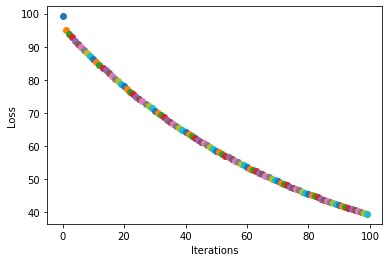

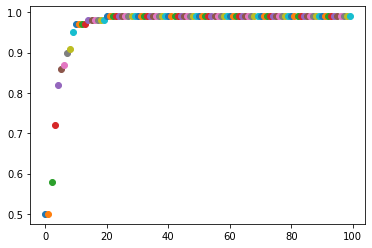

In [5]:
ETA = .0001
ITERS = 100

# Using the slide on Gradient descent as a guide (along with the pseudocode below)
# finish the implementation of gradient descent below


plt1 = plt.ylabel("Loss")
plt1 = plt.xlabel("Iterations")


for i in range(ITERS):

    old_loss = loss(weights=w, features=X, labels=y)

    ## implement the gradient descent step here
    w += - ETA * grad(w, X, y)
    
    new_loss = loss(weights=w, features=X, labels=y)
    acc = accuracy(X= X, w= w, y=y)
    plt1 = plt.figure(1)
    
    plt1 = plt.scatter(i, new_loss)
    plt2 = plt.figure(2)
    plt2 = plt.scatter(i, acc)

    ## the new_loss should be smaller than the old_loss, if you used eta = .0001
    
    print(loss(weights=w, features=X, labels=y), acc) # this should go down each iteration


### Loss by iteration

Modify the gradient descent code to plot the loss at each iteration of the algorithm. What do you observe?

As the iterations increase, the loss decreases.

### Random search vs. gradient descent

Examine the value of the loss after 100 iterations of random search and 100 iterations of gradient descent. Which one optimizes faster? Does that make sense?

The gradient descent optimizes faster because it is actually adjusting the weights based on the learning rate multipled by the negative gradient. Random search is simply comparing 100 iterations of random weights wich may very far off from the optimal weights.

### Accuracy by loss 

Modify the gradient descent code to use the `accuracy` function to measure the accuracy at each iteration of the algorithm. Plot the relationship between accuracy and loss. What do you observe? Does that make sense?

This makes sense because the weights are being continually updated to better predict the class labels of the data. The loss is also decreasing as the number of interations increases. This means that Adaline is doing a better job of predicting the labels.

### Learning rates

Try varing the learning rate eta by increasing or decreasing eta by powers of 10. Make a plot showing the learning rate and the accuracy after 100 iterations, for different valuse of eta. Does the algorithm achieve high accuracy for all eta, or only for some learning rates? Why might this be the case?

In the cases I tested, the algorithm eventually achieved high accuracy in every case. Theoretically, if an eta is too large the alorithm will overshoot the min, but since the loss function is convex, the negative gradient always points in the direction of the min. Generally, the algorithm should reach the min after enough iterations.

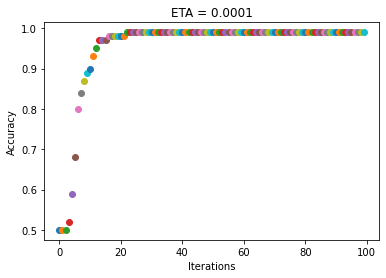

In [6]:

def GD(eta, ITERS = 100, X = X, y= y):
    w = np.random.rand(F).reshape(F,1)
    plt2 = plt.ylabel("Accuracy")
    plt2 = plt.xlabel("Iterations")
    plt2 = plt.title("ETA = " + str(eta))


    for i in range(ITERS):

        old_loss = loss(weights=w, features=X, labels=y)

        ## implement the gradient descent step here
        w += - ETA * grad(w, X, y)

        new_loss = loss(weights=w, features=X, labels=y)
        acc = accuracy(X= X, w= w, y=y)
        plt2 = plt.scatter(i, acc)

        ## the new_loss should be smaller than the old_loss, if you used eta = .0001
GD(0.0001)

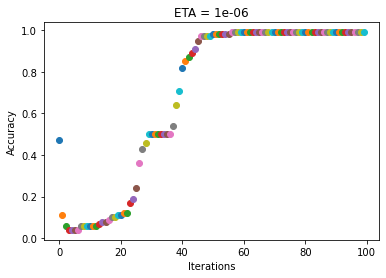

In [7]:
GD(0.000001)

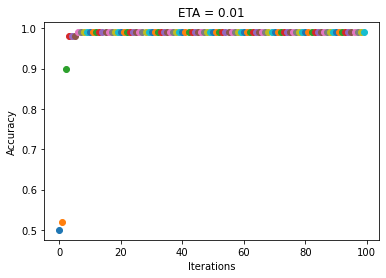

In [8]:
GD(0.01)

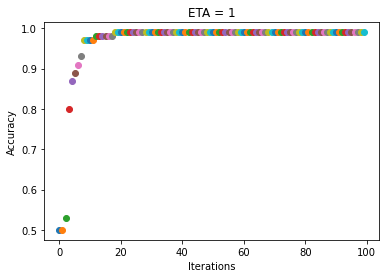

In [9]:
GD(1)